# Final Project Python for Data science : Churn prediction


## Imports

In [1]:
import numpy as np
import pandas as pd
from skrub import TableReport


## Loading data

In [2]:
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')


In [16]:
df_train.shape

(17499636, 19)

## Exploratory Data Analysis

In [3]:
TableReport(df_train)

Processing column  19 / 19


,,,,,,,,,,,,,,,,,,,


In [4]:
df_train.describe()

,status,ts,sessionId,itemInSession,length,time,registration
count,1.749964e+07,1.749964e+07,1.749964e+07,1.749964e+07,1.429143e+07,17499636,17499636
mean,2.091387e+02,1.540428e+12,8.480294e+04,1.055937e+02,2.487135e+02,2018-10-25 00:47:01.161927,2018-08-25 04:40:21.543066
min,2.000000e+02,1.538352e+12,1.000000e+00,0.000000e+00,5.220000e-01,2018-10-01 00:00:01,2017-10-14 22:05:25
25%,2.000000e+02,1.539340e+12,2.515900e+04,2.600000e+01,1.998885e+02,2018-10-12 10:33:57.750000,2018-08-10 21:14:59
50%,2.000000e+02,1.540397e+12,7.903800e+04,6.600000e+01,2.340828e+02,2018-10-24 15:58:54,2018-09-05 18:35:50
75%,2.000000e+02,1.541500e+12,1.383680e+05,1.440000e+02,2.768714e+02,2018-11-06 10:25:35,2018-09-20 17:24:57
max,4.040000e+02,1.542672e+12,2.070030e+05,1.426000e+03,3.024666e+03,2018-11-20 00:00:00,2018-11-19 23:34:34
std,3.023050e+01,1.233485e+09,6.141427e+04,1.168854e+02,9.722845e+01,NaN,NaN


In [5]:
df_train.dtypes

status                    int64
gender                   object
firstName                object
level                    object
lastName                 object
userId                   object
ts                        int64
auth                     object
page                     object
sessionId                 int64
location                 object
itemInSession             int64
userAgent                object
method                   object
length                  float64
song                     object
artist                   object
time             datetime64[us]
registration     datetime64[us]
dtype: object

In [15]:
df_train.sample(5)

,status,gender,firstName,level,lastName,userId,ts,auth,page,sessionId,location,itemInSession,userAgent,method,length,song,artist,time,registration
251758,200,M,Constantine,paid,Smith,1323172,1538427580000,Logged In,NextSong,12309,"Greenville-Anderson-Mauldin, SC",159,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,240.63955,We Won't Run,Sarah Blasko,2018-10-01 20:59:40,2018-09-16 14:12:07
8389221,200,F,Elise,paid,Holmes,1300981,1540512480000,Logged In,NextSong,95803,"Midland, TX",565,"""Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebK...",PUT,77.60934,Contention,MxPx,2018-10-26 00:08:00,2018-09-26 10:53:04
23852508,200,F,Anastasia,paid,Ramos,1215417,1539850224000,Logged In,NextSong,15776,"Stockton-Lodi, CA",263,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",PUT,356.20526,I've Got A Xerox To Copy,Junkie XL,2018-10-18 08:10:24,2018-09-08 05:23:37
4944877,200,F,Elaina,free,Luna,1614159,1539676276000,Logged In,NextSong,87130,"Los Angeles-Long Beach-Anaheim, CA",22,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:30.0) G...,PUT,176.32608,Ammaelis,Amiina,2018-10-16 07:51:16,2018-09-18 15:19:56
22241112,200,M,Paul,free,Rodriguez,1294103,1541354047000,Logged In,NextSong,22843,"Chicago-Naperville-Elgin, IL-IN-WI",50,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",PUT,214.93506,Pump It,Black Eyed Peas,2018-11-04 17:54:07,2018-09-21 11:28:07


,status,gender,firstName,level,lastName,userId,ts,auth,page,sessionId,location,itemInSession,userAgent,method,length,song,artist,time,registration
6662491,200,M,Shlok,paid,Johnson,1749042,1540084584000,Cancelled,Cancellation Confirmation,100362,"Dallas-Fort Worth-Arlington, TX",62,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",GET,NaN,None,None,2018-10-21 01:16:24,2018-08-08 13:22:21
6661531,307,M,Shlok,paid,Johnson,1749042,1540084194000,Logged In,Cancel,100362,"Dallas-Fort Worth-Arlington, TX",61,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,NaN,None,None,2018-10-21 01:09:54,2018-08-08 13:22:21
6661525,200,M,Shlok,paid,Johnson,1749042,1540084193000,Logged In,Downgrade,100362,"Dallas-Fort Worth-Arlington, TX",60,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",GET,NaN,None,None,2018-10-21 01:09:53,2018-08-08 13:22:21
6661269,200,M,Shlok,paid,Johnson,1749042,1540084093000,Logged In,Home,100362,"Dallas-Fort Worth-Arlington, TX",59,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",GET,NaN,None,None,2018-10-21 01:08:13,2018-08-08 13:22:21
6660411,307,M,Shlok,paid,Johnson,1749042,1540083704000,Logged In,Logout,100362,"Dallas-Fort Worth-Arlington, TX",56,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,NaN,None,None,2018-10-21 01:01:44,2018-08-08 13:22:21
6660406,200,M,Shlok,paid,Johnson,1749042,1540083703000,Logged In,NextSong,100362,"Dallas-Fort Worth-Arlington, TX",55,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,201.79546,Crazy Bitch (Album Version),Buckcherry,2018-10-21 01:01:43,2018-08-08 13:22:21
6659966,200,M,Shlok,paid,Johnson,1749042,1540083521000,Logged In,NextSong,100362,"Dallas-Fort Worth-Arlington, TX",54,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,182.83057,Sideways,Dierks Bentley,2018-10-21 00:58:41,2018-08-08 13:22:21
6659409,200,M,Shlok,paid,Johnson,1749042,1540083295000,Logged In,NextSong,100362,"Dallas-Fort Worth-Arlington, TX",53,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,226.03710,All That We Perceive,Thievery Corporation,2018-10-21 00:54:55,2018-08-08 13:22:21
6658681,200,M,Shlok,paid,Johnson,1749042,1540083005000,Logged In,Add to Playlist,100362,"Dallas-Fort Worth-Arlington, TX",52,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,NaN,None,None,2018-10-21 00:50:05,2018-08-08 13:22:21
6658537,307,M,Shlok,paid,Johnson,1749042,1540082944000,Logged In,Thumbs Up,100362,"Dallas-Fort Worth-Arlington, TX",51,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,NaN,None,None,2018-10-21 00:49:04,2018-08-08 13:22:21


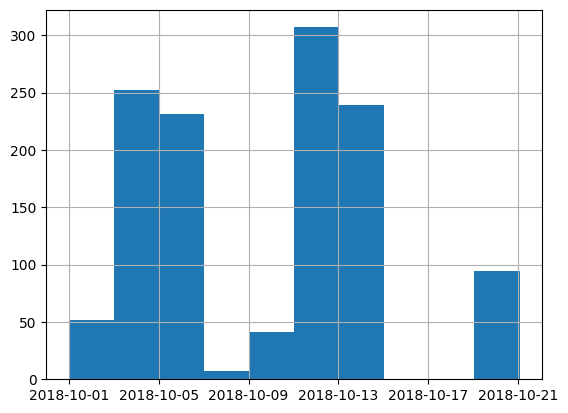

In [6]:
view = df_train[(df_train['userId'] == "1749042")].sort_values(by ="time", ascending = False)
view["time"].hist()
view.head(10)

Il y a beaucoup de biais : avant de cancel il y a des actions à faire, les chansons sont nan quand l'action n'est pas d'écouter une musique. 

Il y a beaucoup de variables qui n'ont pas l'air explicatives (nom prénom). 

Il faudrait voir comment réussir à traiter en panels tous les id (group by day ? mais plusieurs actions par jour dont possiblement un cancel). L'output est censé être id->target, il faut donc aussi voir comment les observations sont traitées dans le fit ( si on split pour un validation test, qui est donc plus tard dans le futur, il est possible que le y change entre la fin du train et la fin de validation)

Il faudrait créer le booléen qui est la target variable. Ce serait y_t = jusque t, l'utilisateur n'a pas churn. 

ce qui fait le plus sens au niveau métier pour prédire ce churn, ce serait la longueur de l'abonnement, le nombre d'actions par jour . Attention dans l'exemple ci-dessus, il y a beaucoup d 'activités le jour du cancel

Il faudrait voir comment créer un validation set 

il faudrait voir comment drop des colonnes avc la certitude qu'elles ne donnent pas d'infos

Peut-on aussi drop des lignes ? 



## Train validation split

In [ ]:
train_indices = df_train['userId'].resample()

## Preprocessing / Feature Engineering

In [8]:
train_set.columns

Index(['status', 'gender', 'firstName', 'level', 'lastName', 'userId', 'ts',
       'auth', 'page', 'sessionId', 'location', 'itemInSession', 'userAgent',
       'method', 'length', 'song', 'artist', 'time', 'registration'],
      dtype='object')

In [9]:
# creation of new columns
train_set['device'] = train_set['userAgent'].apply(
    lambda x: 'iPhone' if 'iPhone' in x else
              'Android' if 'Android' in x else
              'Mac' if 'Macintosh' in x else
              'Windows' if 'Windows' in x else
              'Linux' if 'Linux' in x else
              'Other'
)

train_set['browser'] = train_set['userAgent'].replace({
    r'.*Chrome.*': 'Chrome',
    r'.*Firefox.*': 'Firefox',
    r'.*Safari.*': 'Safari',
    r'.*Edge.*': 'Edge'
}, regex=True)
train_set['browser'] = train_set['browser'].fillna('Other')


C:\Users\silab\AppData\Local\Temp\ipykernel_51108\2835146221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['device'] = train_set['userAgent'].apply(
C:\Users\silab\AppData\Local\Temp\ipykernel_51108\2835146221.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['browser'] = train_set['userAgent'].replace({
C:\Users\silab\AppData\Local\Temp\ipykernel_51108\2835146221.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [10]:
train_set["duration_of_account"] = train_set["time"] - train_set['registration']

C:\Users\silab\AppData\Local\Temp\ipykernel_51108\2323581890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["duration_of_account"] = train_set["time"] - train_set['registration']


In [11]:
encode_columns = ["gender", "level", "page"]
columns_to_drop = ["firstName", "lastName", "song", 
                   "artist", "ts","status", "auth", "userAgent"] # method
train_set.drop(columns = columns_to_drop)

,gender,level,userId,page,sessionId,location,itemInSession,method,length,time,registration,device,browser,duration_of_account
0,M,paid,1749042,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",278,PUT,524.32934,2018-10-01 00:00:01,2018-08-08 13:22:21,Windows,Chrome,53 days 10:37:40
992,M,paid,1749042,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",279,PUT,178.02404,2018-10-01 00:08:45,2018-08-08 13:22:21,Windows,Chrome,53 days 10:46:24
1360,M,paid,1749042,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",280,PUT,232.61995,2018-10-01 00:11:43,2018-08-08 13:22:21,Windows,Chrome,53 days 10:49:22
1825,M,paid,1749042,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",281,PUT,265.50812,2018-10-01 00:15:35,2018-08-08 13:22:21,Windows,Chrome,53 days 10:53:14
2366,M,paid,1749042,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",282,PUT,471.69261,2018-10-01 00:20:00,2018-08-08 13:22:21,Windows,Chrome,53 days 10:57:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24173636,M,paid,1228577,NextSong,2575,"Tulsa, OK",15,PUT,208.24771,2018-10-23 23:46:45,2018-09-30 15:50:54,Windows,Firefox,23 days 07:55:51
24173637,M,paid,1228577,Thumbs Up,2575,"Tulsa, OK",16,PUT,NaN,2018-10-23 23:46:46,2018-09-30 15:50:54,Windows,Firefox,23 days 07:55:52
24173789,M,paid,1228577,NextSong,2575,"Tulsa, OK",17,PUT,304.03873,2018-10-23 23:50:13,2018-09-30 15:50:54,Windows,Firefox,23 days 07:59:19
24174023,M,paid,1228577,NextSong,2575,"Tulsa, OK",18,PUT,255.37261,2018-10-23 23:55:17,2018-09-30 15:50:54,Windows,Firefox,23 days 08:04:23


question de la granularité : on group by par day ? et dans ce cas là comment o fait si plusiuers plateformes ?

In [12]:
# target 
train_target = ""

## Modelisation


## Hyperparameter Tuning 